In [7]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv("Cardiotocographic.csv")

In [9]:
df.shape

(2126, 14)

In [10]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [11]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [12]:
df=df.fillna(df.median)

In [13]:

df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [14]:
df.duplicated().sum()


2

In [23]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [27]:
df.dtypes

LB           object
AC           object
FM          float64
UC          float64
DL          float64
DS           object
DP           object
ASTV        float64
MSTV        float64
ALTV        float64
MLTV         object
Width        object
Tendency     object
NSP          object
dtype: object

In [29]:
df["LB"]=pd.to_numeric(df["LB"],errors="coerce")
df["AC"]=pd.to_numeric(df["AC"],errors="coerce")
df["DS"]=pd.to_numeric(df["DS"],errors="coerce")
df["DP"]=pd.to_numeric(df["DP"],errors="coerce")
df["MLTV"]=pd.to_numeric(df["LB"],errors="coerce")
df["Width"]=pd.to_numeric(df["Width"],errors="coerce")
df["Tendency"]=pd.to_numeric(df["Tendency"],errors="coerce")
df["NSP"]=pd.to_numeric(df["NSP"],errors="coerce")

In [31]:
df.dtypes


LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

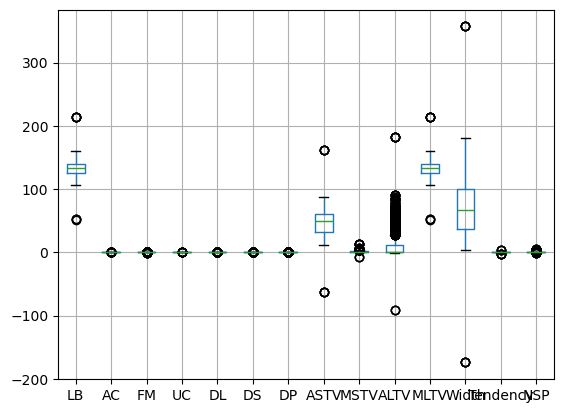

In [33]:
df.boxplot()
plt.show()

In [35]:
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extreme=q1-1.5*iqr
    upper_extreme=q3+1.5*iqr
    df[column]=df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)


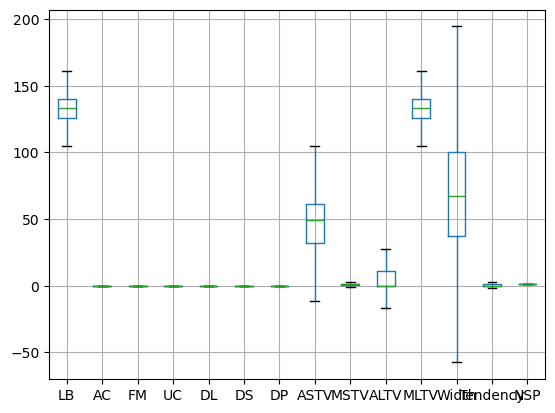

In [37]:
df.boxplot()
plt.show()

In [39]:
df["LB"].mean()

133.29160413871284

In [41]:
df.describe()


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2103.000000,2104.000000,2124.000000,2124.000000,2124.000000,2103.0,2103.0,2124.000000,2124.000000,2124.000000,2103.000000,2103.000000,2103.000000,2103.0
mean,133.291604,0.003149,0.001570,0.004365,0.001772,0.0,0.0,46.998334,1.304554,6.697979,133.291604,70.351685,0.319999,1.0
std,9.976211,0.003851,0.002487,0.003001,0.002670,0.0,0.0,17.609911,0.781303,10.381254,9.976211,39.773195,0.624916,0.0
min,105.000000,-0.008475,-0.003853,-0.005158,-0.004938,0.0,0.0,-11.500000,-0.800000,-16.500000,105.000000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001858,0.000000,0.0,0.0,32.000000,0.700000,0.000000,126.000000,37.000000,0.000000,1.0
50%,133.000000,0.001634,0.000000,0.004486,0.000000,0.0,0.0,49.000000,1.200000,0.000000,133.000000,67.486468,0.000000,1.0
75%,140.000000,0.005650,0.002568,0.006536,0.003292,0.0,0.0,61.000000,1.700000,11.000000,140.000000,100.000000,1.000000,1.0
max,161.000000,0.014124,0.006421,0.013552,0.008230,0.0,0.0,104.500000,3.200000,27.500000,161.000000,194.500000,2.500000,1.0


In [43]:
df.median()

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004486
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV        133.000000
Width        67.486468
Tendency      0.000000
NSP           1.000000
dtype: float64

In [45]:
df.mean()

LB          133.291604
AC            0.003149
FM            0.001570
UC            0.004365
DL            0.001772
DS            0.000000
DP            0.000000
ASTV         46.998334
MSTV          1.304554
ALTV          6.697979
MLTV        133.291604
Width        70.351685
Tendency      0.319999
NSP           1.000000
dtype: float64

In [47]:
df.std()

LB           9.976211
AC           0.003851
FM           0.002487
UC           0.003001
DL           0.002670
DS           0.000000
DP           0.000000
ASTV        17.609911
MSTV         0.781303
ALTV        10.381254
MLTV         9.976211
Width       39.773195
Tendency     0.624916
NSP          0.000000
dtype: float64

In [49]:
df.hist()

array([[<Axes: title={'center': 'LB'}>, <Axes: title={'center': 'AC'}>,
        <Axes: title={'center': 'FM'}>, <Axes: title={'center': 'UC'}>],
       [<Axes: title={'center': 'DL'}>, <Axes: title={'center': 'DS'}>,
        <Axes: title={'center': 'DP'}>, <Axes: title={'center': 'ASTV'}>],
       [<Axes: title={'center': 'MSTV'}>,
        <Axes: title={'center': 'ALTV'}>,
        <Axes: title={'center': 'MLTV'}>,
        <Axes: title={'center': 'Width'}>],
       [<Axes: title={'center': 'Tendency'}>,
        <Axes: title={'center': 'NSP'}>, <Axes: >, <Axes: >]],
      dtype=object)

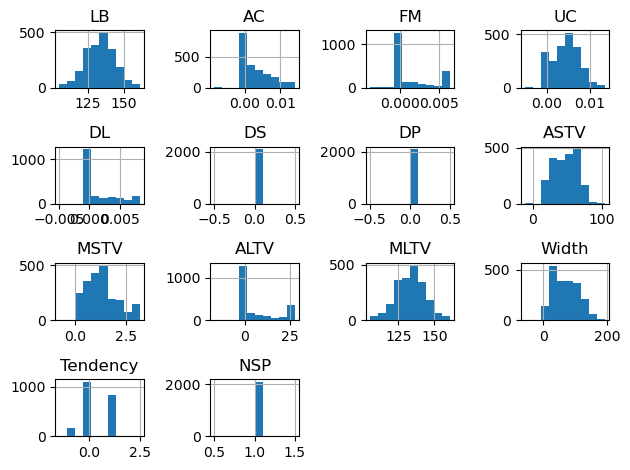

In [50]:
plt.tight_layout()
plt.show()



In [53]:
corr=df.corr()
corr


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.081715,-0.006859,-0.163765,-0.156858,NaN,NaN,0.286501,-0.297040,0.323777,1.000000,-0.140008,0.281361,NaN
AC,-0.081715,1.000000,0.076600,0.093536,-0.103370,NaN,NaN,-0.273942,0.219101,-0.410713,-0.081715,0.284221,0.029530,NaN
FM,-0.006859,0.076600,1.000000,-0.318156,-0.018024,NaN,NaN,0.155798,0.070412,-0.013820,-0.006859,0.165220,0.000681,NaN
UC,-0.163765,0.093536,-0.318156,1.000000,0.268151,NaN,NaN,-0.217484,0.298462,-0.294226,-0.163765,0.131470,-0.074464,NaN
DL,-0.156858,-0.103370,-0.018024,0.268151,1.000000,NaN,NaN,-0.112289,0.566625,-0.296383,-0.156858,0.516234,0.014642,NaN
DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ASTV,0.286501,-0.273942,0.155798,-0.217484,-0.112289,NaN,NaN,1.000000,-0.433731,0.438800,0.286501,-0.243003,-0.010316,NaN
MSTV,-0.297040,0.219101,0.070412,0.298462,0.566625,NaN,NaN,-0.433731,1.000000,-0.541296,-0.297040,0.650855,-0.063484,NaN
ALTV,0.323777,-0.410713,-0.013820,-0.294226,-0.296383,NaN,NaN,0.438800,-0.541296,1.000000,0.323777,-0.441284,0.050687,NaN


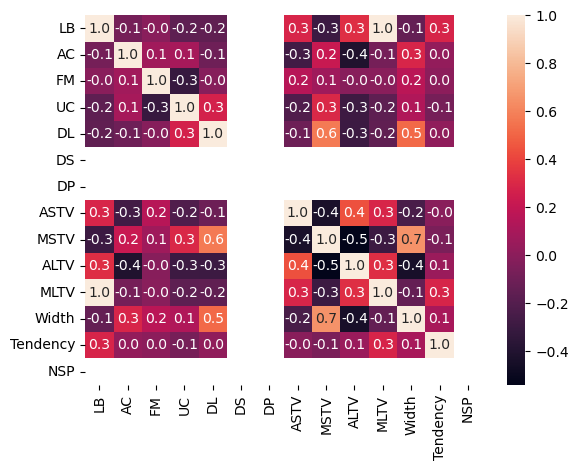

In [55]:
sns.heatmap(corr,annot=True,fmt='.1f')
plt.show()

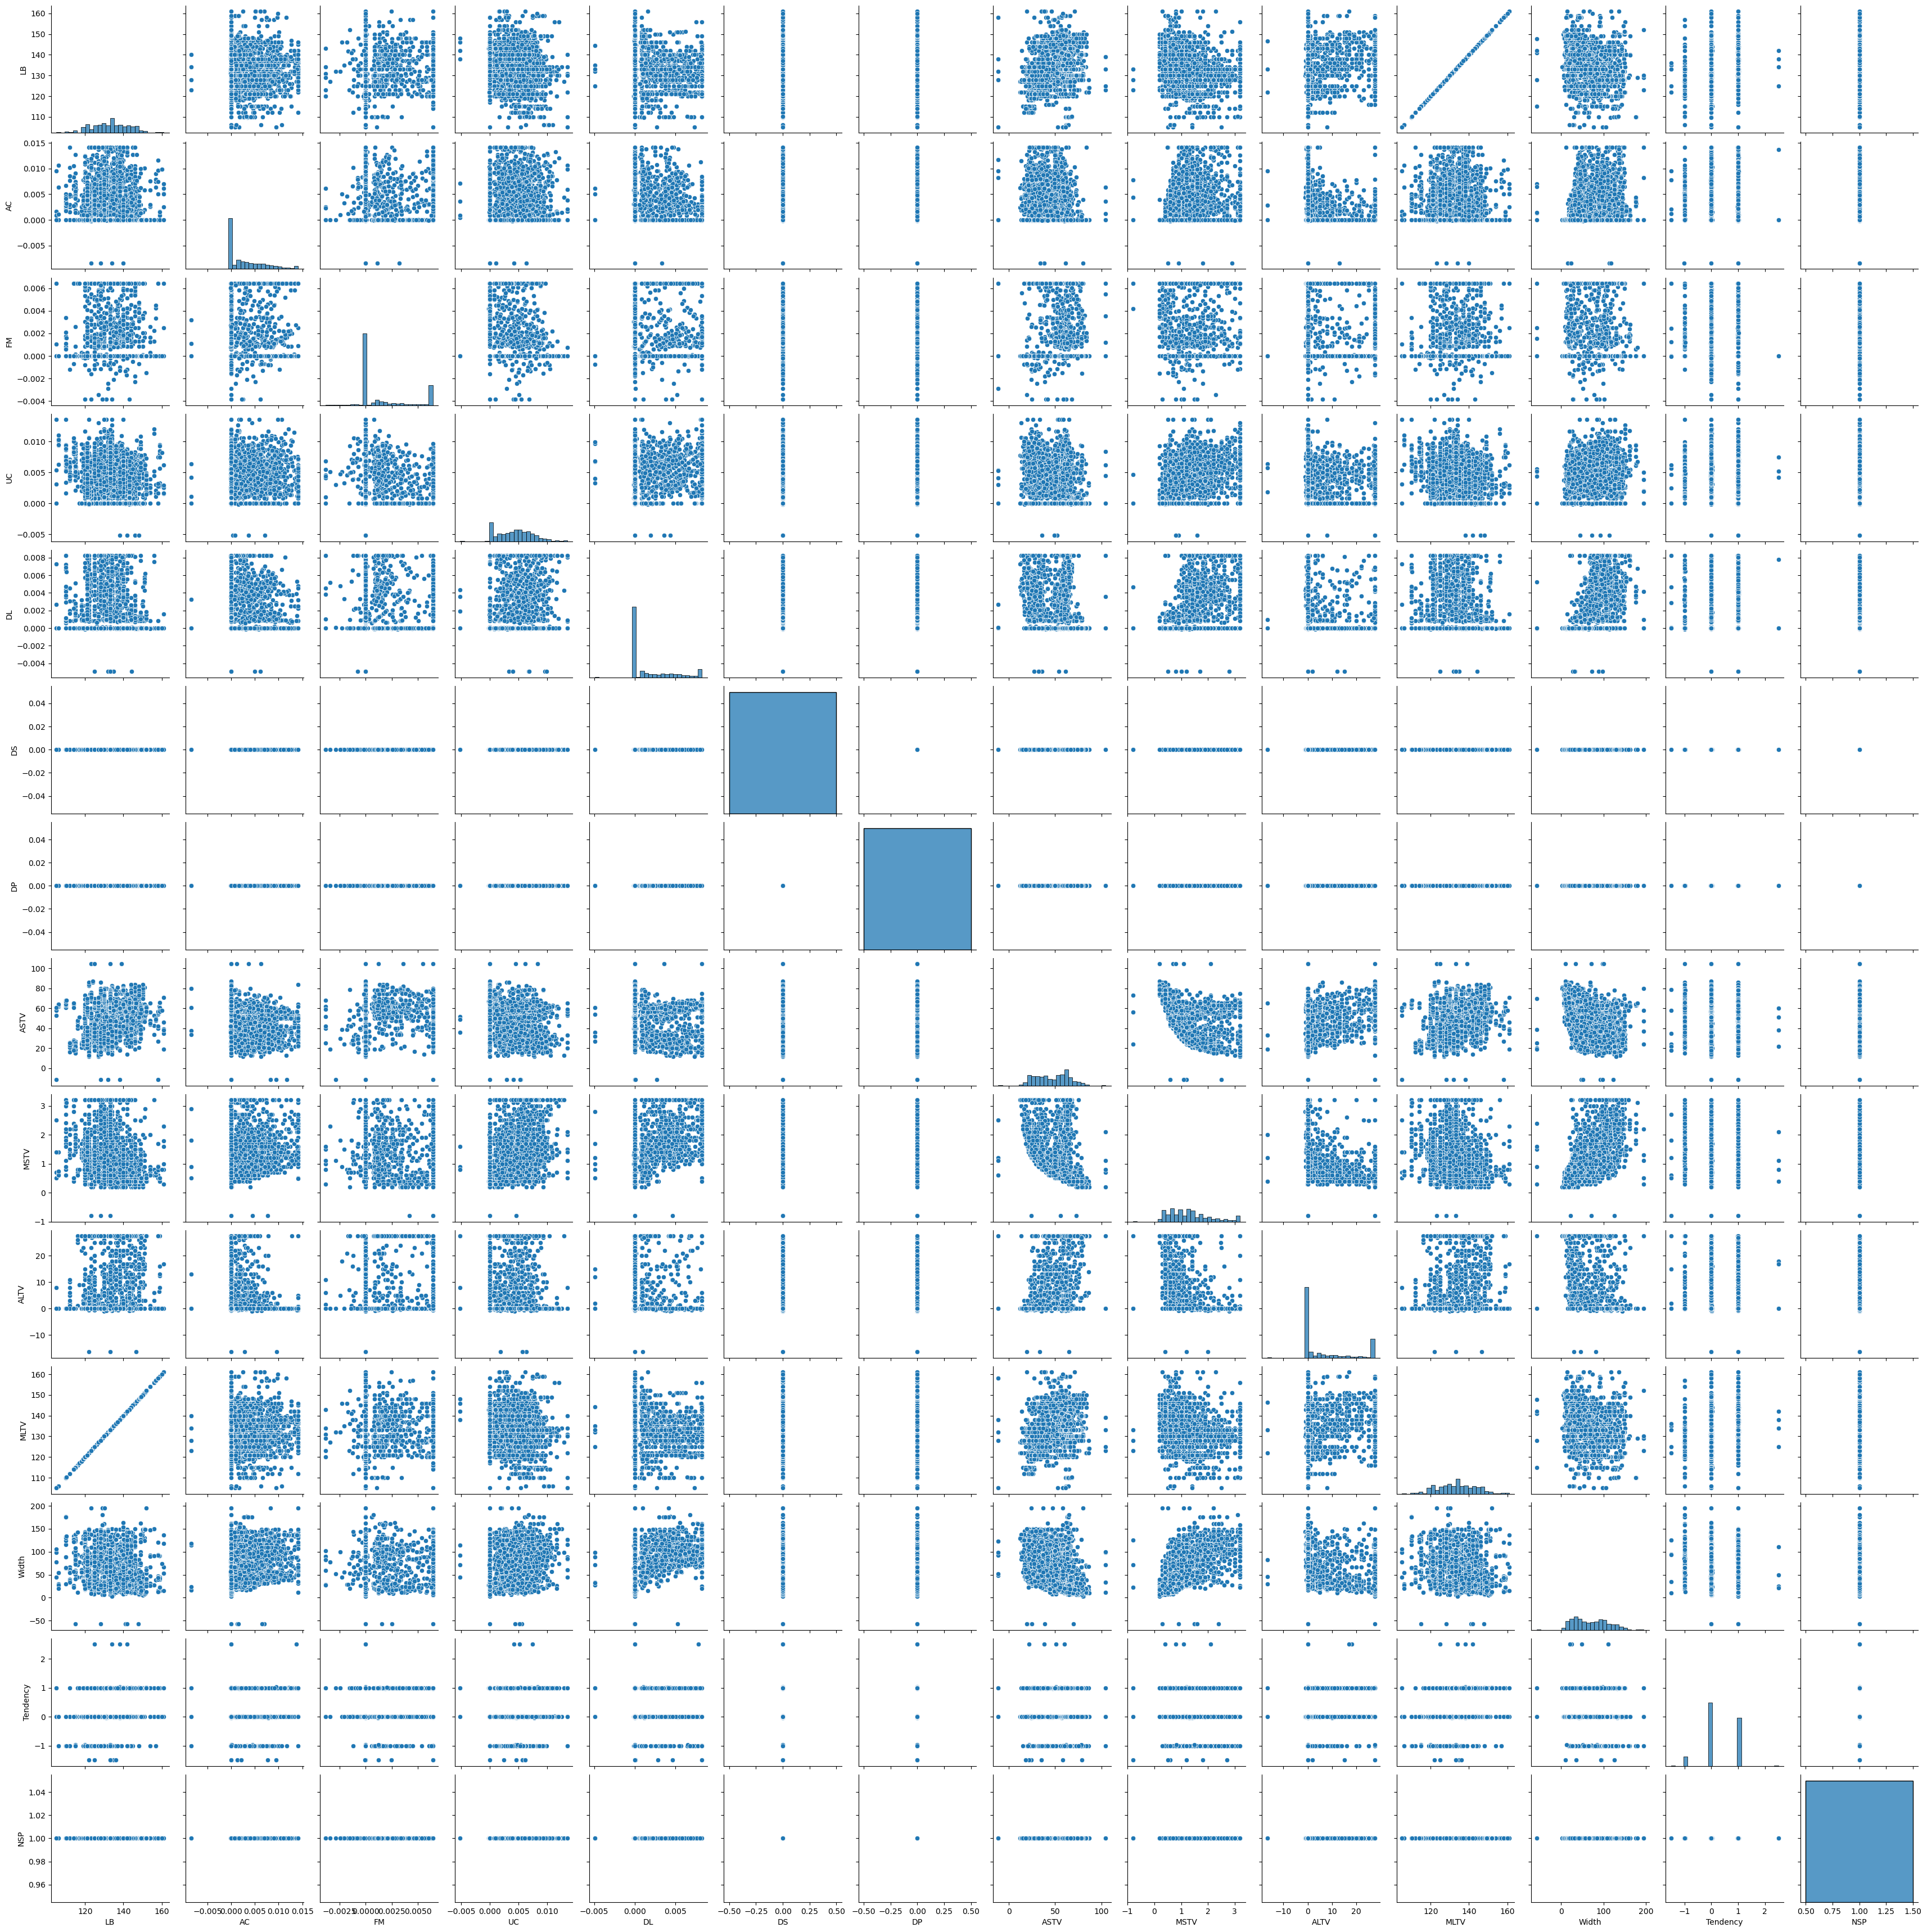

In [57]:
sns.pairplot(data=df)
plt.show()


In [76]:
sns.scatterplot(data=df,x='ASTV',y='AC',c='red') ##### trends


<Axes: xlabel='ASTV', ylabel='AC'>

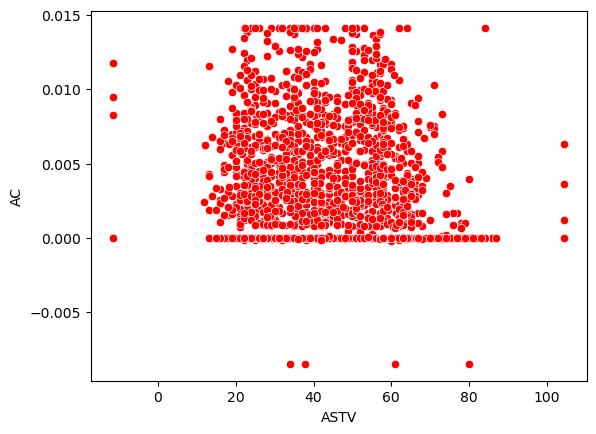

In [78]:
plt.show()